## CS 200: Machine Learning


<p>
<script language="JavaScript">
document.write("Last modified: " + document.lastModified)
</script>
    
Notes from CS 458 Automated Decision Systems, which also covered rule-based expert systems and case-based systems.

### Why? 

Both practical and scientific reasons. First, when discussing rule-based expert systems, we mentioned the knowledge engineering bottleneck. It was difficult to get the rules out of the head of the domain expert and into the computer. Case-based systems offered a way to simplify that task by transferring experience instead of rules. The human domain expert had access to her own cases or stories or experience, and could recapitulate that information.

Machine learning suggests that we move one more step in that direction. Take the human out of the loop and let the machine learn from its own experiences.

Second, as we study the process of learning, we can develop better scientific theories of human learning. How do people learn? How can we improve the process of learning? How can we improve education and training?

### Categories.
<b>Supervised learning:</b> The computer is presented with example inputs and their desired outputs, given by a "teacher", and the goal is to learn a general rule that maps inputs to outputs.

<b>Unsupervised learning:</b> No labels are given to the learning algorithm, leaving it on its own to find structure in its input. Unsupervised learning can be a goal in itself (discovering hidden patterns in data) or a means towards an end (feature learning).

<b>Reinforcement learning:</b> A computer program interacts with a dynamic environment in which it must perform a certain goal (such as driving a vehicle), without a teacher explicitly telling it whether it has come close to its goal. Another example is learning to play a game by playing against an opponent.

### Tasks.
<b>Classification:</b> Inputs are divided into two or more classes, and the learner must produce a model that assigns unseen inputs to one or more (multi-label classification) of these classes. This is typically tackled in a supervised way. Spam filtering is an example of classification, where the inputs are email (or other) messages and the classes are "spam" and "not spam".

<b>Regression</b> (also a supervised problem), the outputs are continuous rather than discrete.  For example, a firm might use linear regression to develop a model 
to predict sales as a function of advertising expenditures.

<b>Clustering</b> A set of inputs is to be divided into groups. Unlike in classification, the groups are not known beforehand, making this typically an unsupervised task.

### Algorithms. 

Below is a list of learning algorithms we will discuss. (There are many more.)

Supervised:
- Naive Bayes
- Support Vector Machines (SVM)
- Decision Tree
- K nearest neighbors
- Random Forest
- Adaboost
- Regression - (Ordinary Least Squares - OLS)

Unsupervised:
- Clustering
- Principle Component Analysis (PCA)

Other notable learning algorithms:
- Hidden Markov Models (used by Alexa)
- TensorFlow (used by Google)

Also, it is often necessary to scrub the data before applying the learning algorithm This process is also known as <a target=ww href="https://en.wikipedia.org/wiki/Data_pre-processing">data pre-processing</a>. You may need to filter missing data or outliers. Though sometimes outliers are more interesting, such as in credit card fraud detection.

### Tools. 
There are many <a target=ww href="https://en.wikipedia.org/wiki/Machine_learning#Software">software tools for machine learning</a> Some are free and others are proprietary. We will focus on one of the free ones: the <a target=ee href="https://scikit-learn.org/stable/">
    sci-kit package for Python</a>, aka, sklearn. It is available on the zoo.

### Examples. 
We will be using examples from the <a target=ww href="https://www.udacity.com/course/intro-to-machine-learning--ud120">Udacity introduction to machine learning course</a> developed by Sebastian Thrun, of self-driving car fame. The course exercises are available online at the zoo at <a target=ee href="https://zoo.cs.yale.edu/classes/cs458/lectures/sklearn/ud/ud120-projects-master/">/c/cs458/www/lectures/sklearn/ud/ud120-projects-master</a>


### Applications. 
Machine learning has been applied to a boatload of domains. Here are some examples.

- Adaptive websites
- Affective computing
- Brain-machine interfaces
- Classifying DNA sequences
- Computer vision, including object recognition
- Detecting credit card fraud
- Game playing
- Marketing
- Medical diagnosis
- Natural language processing
- Natural language understanding
- Online advertising
- Recommender systems
- Robot locomotion
- Search engines
- Self-driving cars (Google)
- Sentiment analysis (or opinion mining)
- Speech and handwriting recognition (Amazon's Alexa)
- Stock market analysis

## Supervised Learning

Here's how it works. In a classification task, you are given the following.

<ol>
<li> A data set of samples, each of which has a vector of features as well as a label, indicating to which class it belongs. Here is an example from the Udacity course based on self-driving cars.

<img height=400 width=400 src="http://zoo.cs.yale.edu/classes/cs458/lectures/sklearn/ud/ud120-projects-master/choose_your_own/test.png">
    

The training data are sets of points in the 2-d space, indicating the bumpiness and grade of the terrain. Associated with each point is a label indicating if the car should drive slow (red) or fast (blue).
<p>
2. A classifier algorithm. This algorithm will process the features and the labels, and construct a formula for mapping features to labels. In sklearn, there are lots of possibilities. Here is the code for the Naive Bayes classifier.

### Naive Bayes

See <a target=ww href="prep_terrain_data.py">prep_terrain_data.py</a> for code that creates the random terrain dataset.

In [7]:
import sys
from time import time
from prep_terrain_data import makeTerrainData
import numpy as np
import pylab as pl

In [8]:
### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [9]:
### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

In [10]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

We create an object <code>clf</code> which is an instance of the Naive Bayes classifier. Each sklearn classifier has a <code>fit()</code> method which has parameters for the training features and labels.

In [11]:
clf.fit(features_train, labels_train)

GaussianNB(priors=None, var_smoothing=1e-09)

The classifier creates a <b>decision boundary</b> which segregates the data into the different classes or categories. In the image above the area with the blue background indicates the conditions the program has learned under which the car can drive fast and the red background indicates the conditions where the car should slow down.
<p>

3. <b>A prediction function.</b> The prediction function simply applies the classifier function created by <code>fit</code> to a new data element, and predicts the label for the new element. In sklearn, classifiers have a <code>predict()</code> method.

In [14]:
clf.predict(features_test)

array([0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0.

4. <b>A scoring function.</b> Once you have used the classifier to fit the data, you can run it on some test data, for which you know the correct answer, and determine how well your classifier performs. Each sklearn classifier has a <code>score()</code> method which allows you to test the classifier with data different from the training data. This process tests the accuracy of your derived model.

In [15]:
clf.score(features_test, labels_test)

0.884

88.4% correct.

You can also create a separate set of predictions for the test data and independently assess the accuracy.

In [16]:
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, pred)

0.884

We added some timing code to see how fast the classification and training goes.

In [17]:
from time import time
print ("\nNaive bayes classifier: \n")
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

t0 = time()
clf.fit(features_train, labels_train)
print ("training time:", round(time()-t0, 3), "s")

t1 = time()
print (clf.score(features_test, labels_test))
print ("scoring time:", round(time()-t1, 3), "s")


Naive bayes classifier: 

training time: 0.001 s
0.884
scoring time: 0.001 s


The accuracy is 88.4%. You probably want your self-driving car to do better than that.

The graphics code is in <a target=ww href="class_vis.py">class_vis.py</a> 

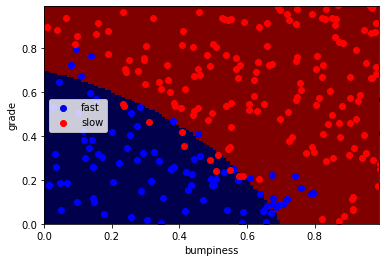

In [18]:
### draw the decision boundary with the text points overlaid
from class_vis import prettyPicture
prettyPicture(clf, features_test, labels_test)

### Support Vector Machine (SVM)

See https://ksatola.github.io/ml-introduction/04_SVM2.html

In [19]:
from sklearn import svm

In [20]:
# Measure time
t0 = time()

# Fit the model
clf = svm.SVC(kernel='rbf', gamma='scale', C=10000)#(kernel='linear')
clf.fit(features_train, labels_train)

print("Training time: {} seconds.".format(round(time()-t0, 3)))

Training time: 0.042 seconds.


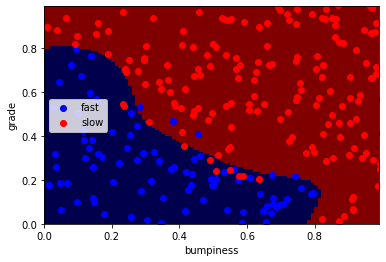

In [22]:
prettyPicture(clf, features_test, labels_test)

In [21]:
clf.score(features_test, labels_test)

0.944

94.4% correct.  Better than naive Bayes.

## Decision Tree

In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(features_train, labels_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
clf.predict(features_test)

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1.

In [26]:
clf.score(features_test, labels_test)

0.908

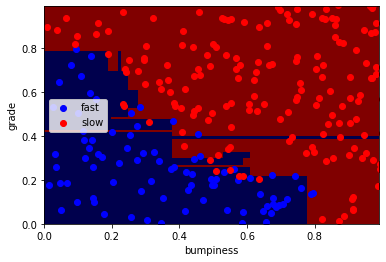

In [27]:
prettyPicture(clf, features_test, labels_test)

## K nearest neighbors

In [28]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(features_train, labels_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [29]:
clf.predict(features_test)

array([0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0.

In [30]:
clf.score(features_test, labels_test)

0.908

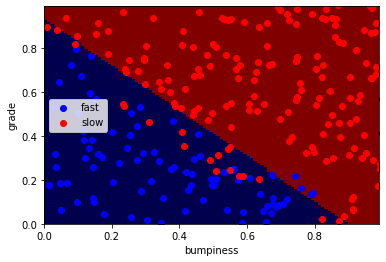

In [31]:
prettyPicture(clf, features_test, labels_test)

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)

In [33]:
clf.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
clf.predict(features_test)

array([0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1.

In [36]:
clf.score(features_test, labels_test)

0.924

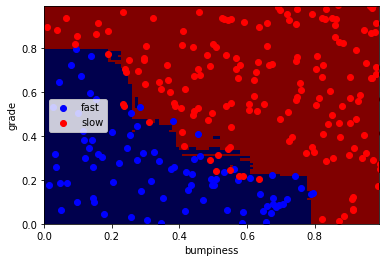

In [37]:
prettyPicture(clf, features_test, labels_test)

## Adaboost

In [39]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)

In [40]:
clf.fit(features_train, labels_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [41]:
clf.predict(features_test)

array([0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1.

In [44]:
clf.score(features_test, labels_test)

0.924

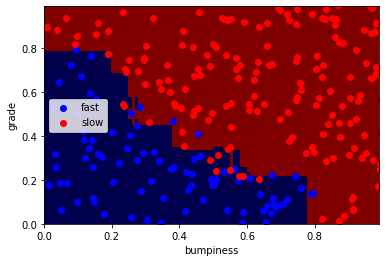

In [45]:
prettyPicture(clf, features_test, labels_test)